## 一、Guanaco

5月24日华盛顿大学的研究者发布了QLoRA技术及用其生成的Guanaco大模型。在Vicuna基准测试中表现优于所有先前公开发布的模型，达到ChatGPT性能水平的99.3%，仅需要单个GPU上的24小时微调时间。业界一片叫好。

将微调65B模型的显存需求从780GB以上降低到48GB以下，效果直逼GPT-4，完全微调的16位基准相比，既不降低运行时间也不降低预测性能

现在可以在单个GPU上微调迄今为止最大的公开可用模型

## 二、QLoRA：量化LLM高效微调

- 动机：降低内存使用，实现在单个48GB GPU上对65B参数模型进行微调，并保持完整的16位微调任务性能。
- 方法：QLORA通过将梯度反向传播到冻结的4比特量化预训练语言模型中，并使用低秩适配器(LoRA)，实现了通过少量内存消耗来保持性能的高效微调方法。
- 优势：QLORA引入了多项创新，旨在在不牺牲性能的情况下减少内存使用，包括4比特NormalFloat数据类型、双重量化和分页优化器等。同时，QLORA的高效性使得可以进行更深入的指令微调和聊天机器人性能研究，并取得了先进的结果。

> QLoRA是一种高效的微调方法，通过降低内存使用，实现在单个GPU上对大型语言模型进行微调，并取得了先进的性能结果。
>

## 三、QLoRA原理

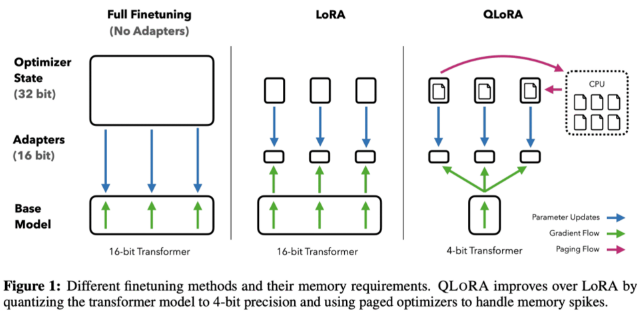

### 1、4NF

***4 位 NormalFloat 量化(4-bit NormalFloat Quantization )*** NormalFloat（NF）数据类型基于分位数量化[15]，它是一种信息理论上最优的数据类型，确保每个量化区间中有相等数量的值来自输入张量。分位数量化通过估计输入张量的分位数来实现，这是通过经验累积分布函数来进行的。

分位数估计过程的主要限制是其昂贵的计算成本，因此，使用快速分位数近似算法，例如 SRAM 分位数[15]，来估计它们

### 2、QD

***量化(Double Quantization)*** 我们引入了双量化（DQ）的过程，用于对量化常数进行量化以实现额外的内存节省

### 3、Paged optimizer

***页优化器(Paged Optimizers )*** 使用 NVIDIA 统一内存功能，在 GPU 偶尔内存不足时自动进行页面传输，以实现无误差的 GPU 处理。当 GPU 内存不足时，自动将其置于 CPU RAM 中，并在优化器更新步骤中需要内存时重新放回 GPU 内存

## 四、线上demo
- 私有化部署：

https://colab.research.google.com/drive/15oufNQqIBkSrYvioVv5kPrDYm9JsuWZP#scrollTo=2QK51MtdsMLu

- 线上demo:

https://huggingface.co/spaces/uwnlp/guanaco-playground-tgi

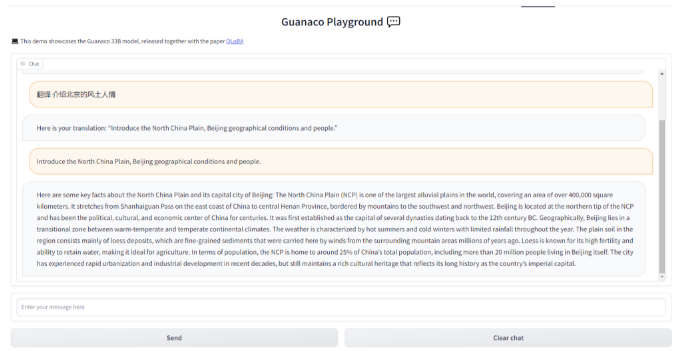

## 五、fine-tuing
- demo:
https://colab.research.google.com/drive/1VoYNfYDKcKRQRor98Zbf2-9VQTtGJ24k?usp=sharing#scrollTo=Ybeyl20n3dYH